# ASSIGNMENT 10: SUPPORT VECTOR MACHINE

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Task 01: Exploratory Data Analysis

In [12]:
data = pd.read_csv('Pharma_Industry.csv')
data

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [13]:
data.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [15]:
data.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


* <b> Histogram </b>

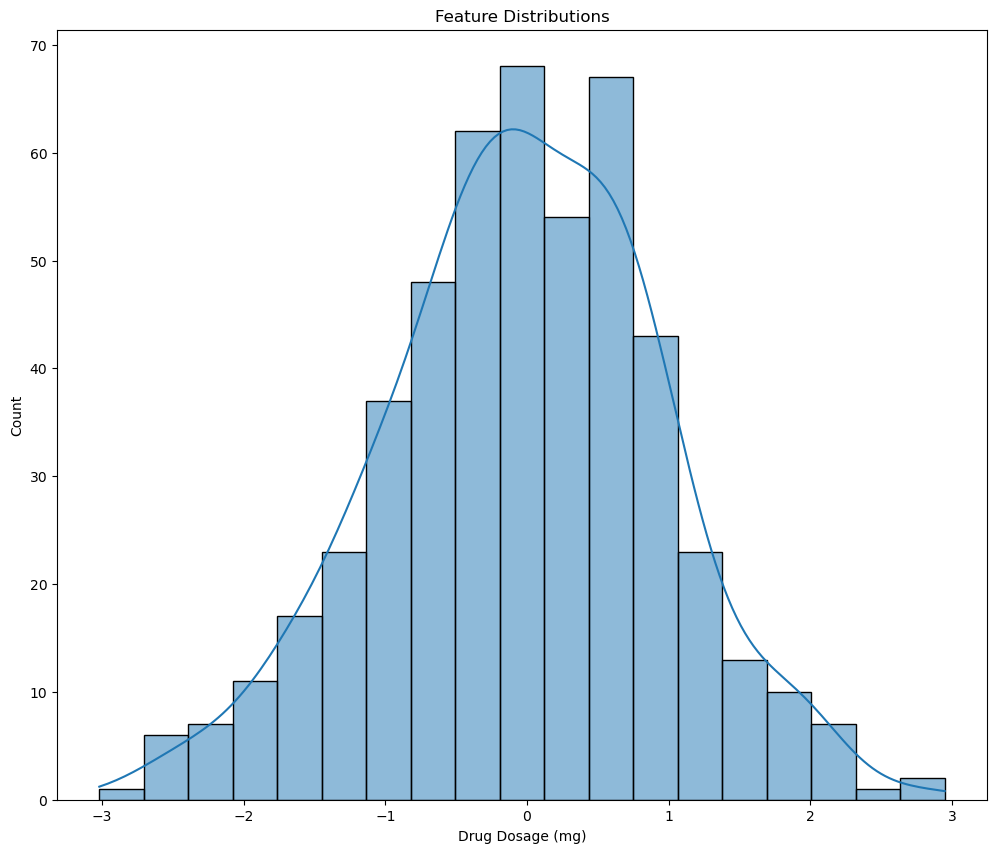

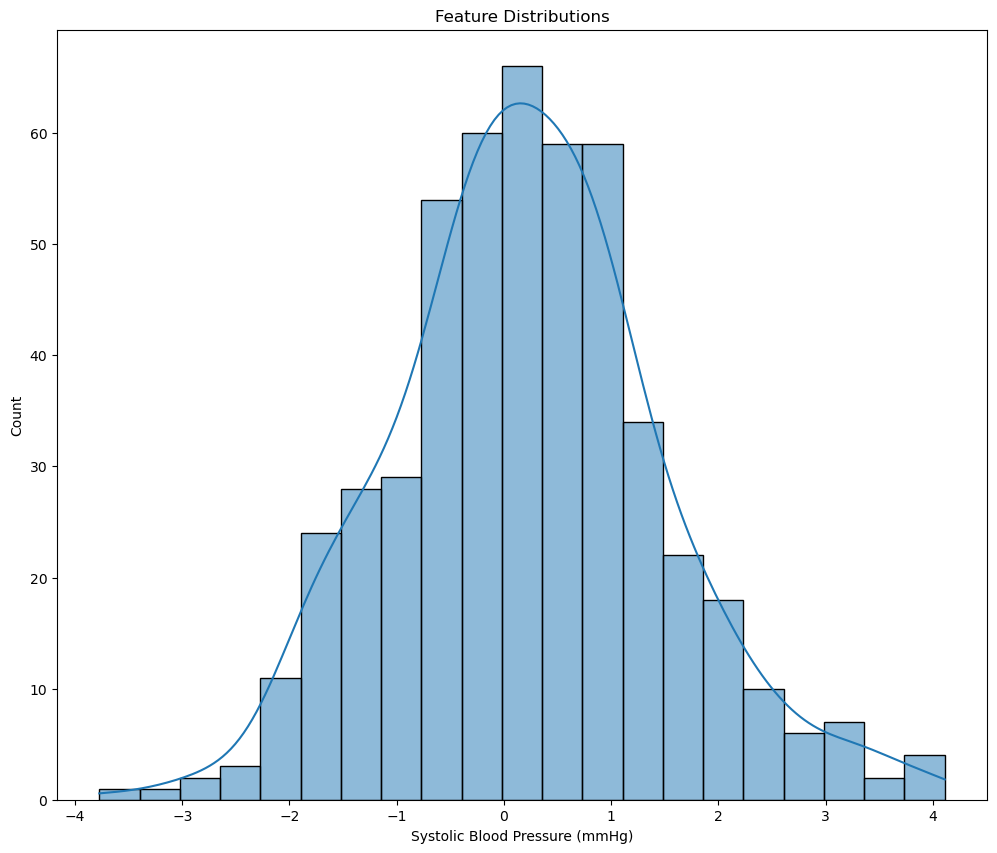

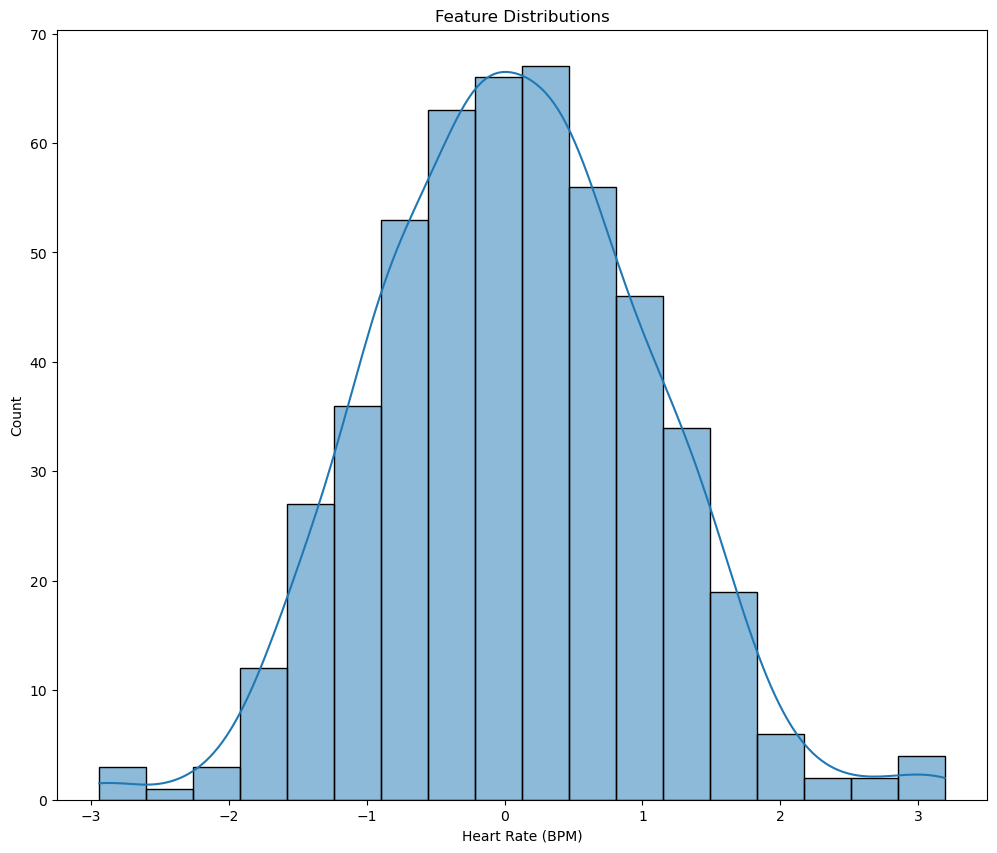

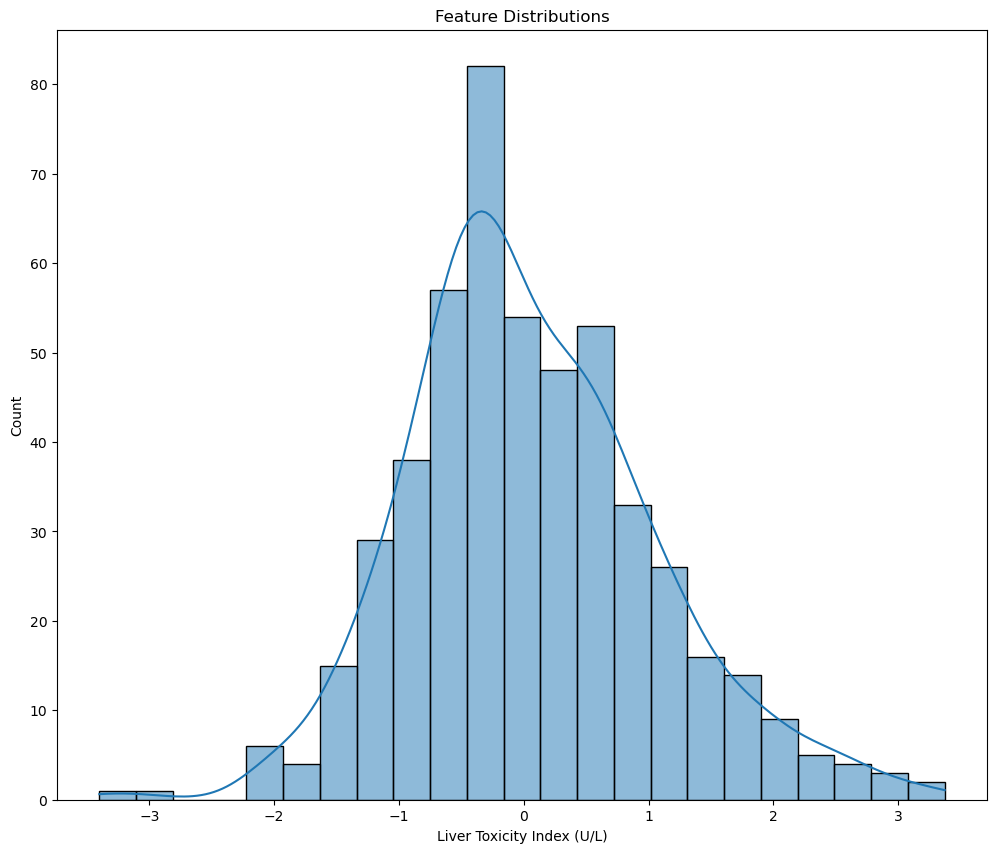

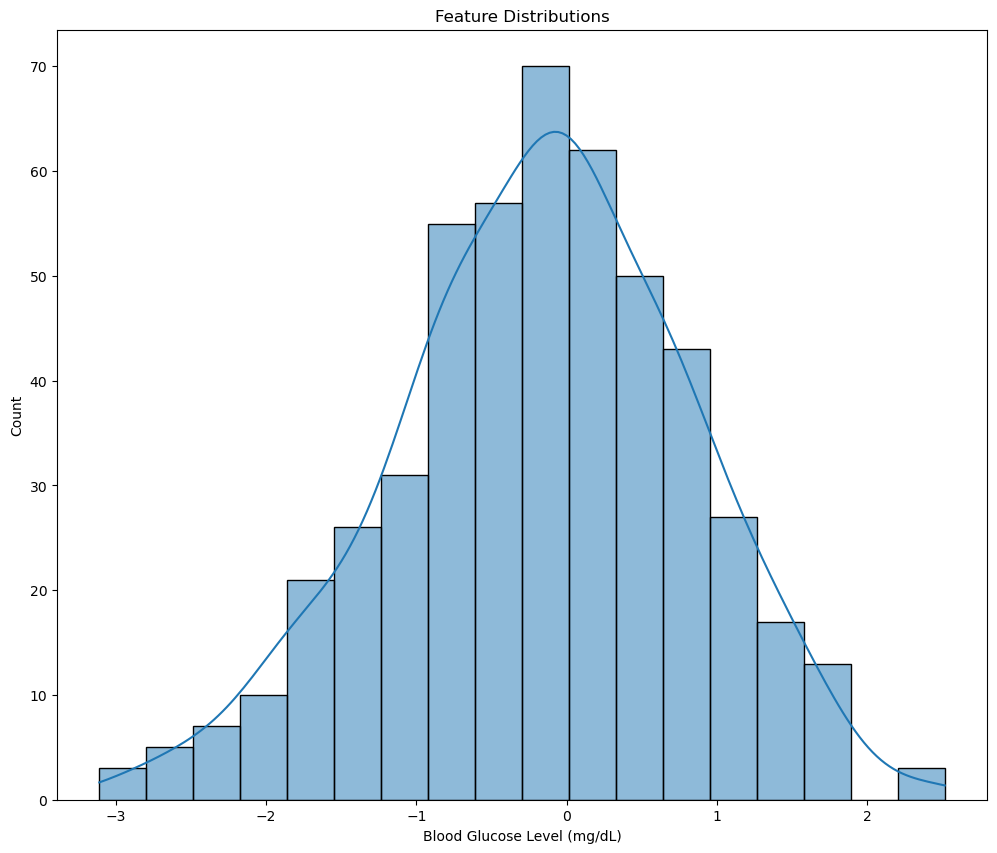

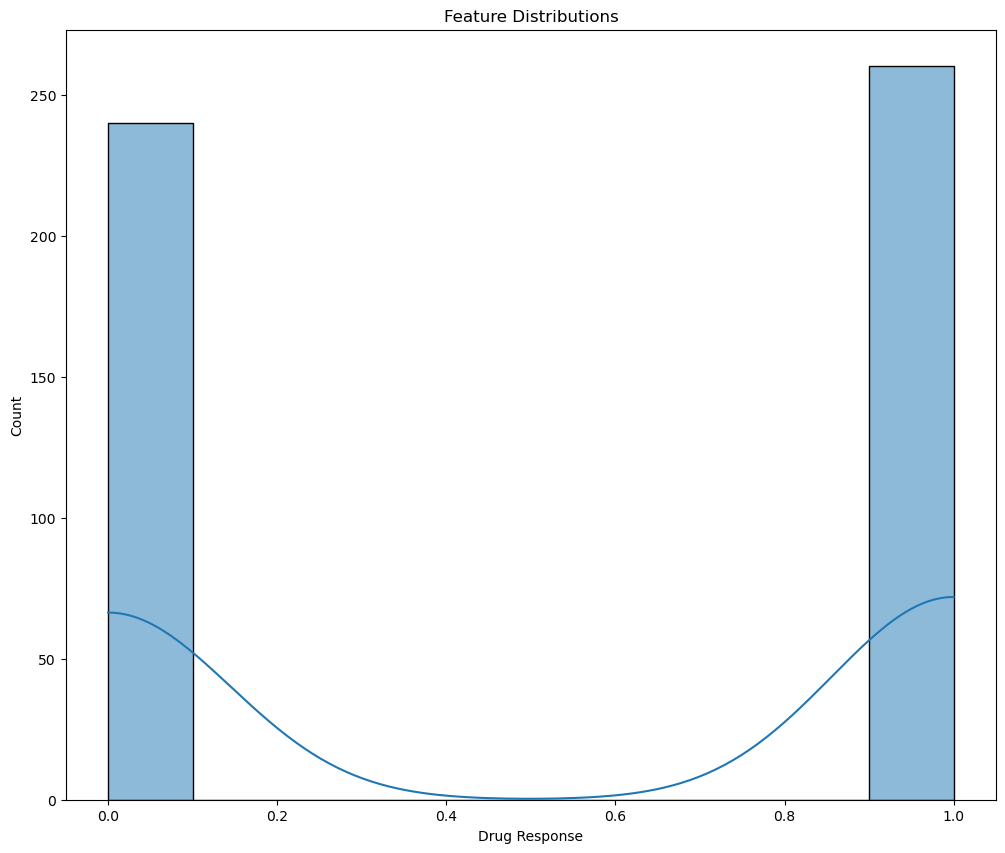

In [16]:
for col in data:
    plt.figure(figsize=(12,10))
    sns.histplot(data[col], kde=True)
    plt.title('Feature Distributions')
    plt.show()

* <b> Boxplot </b>

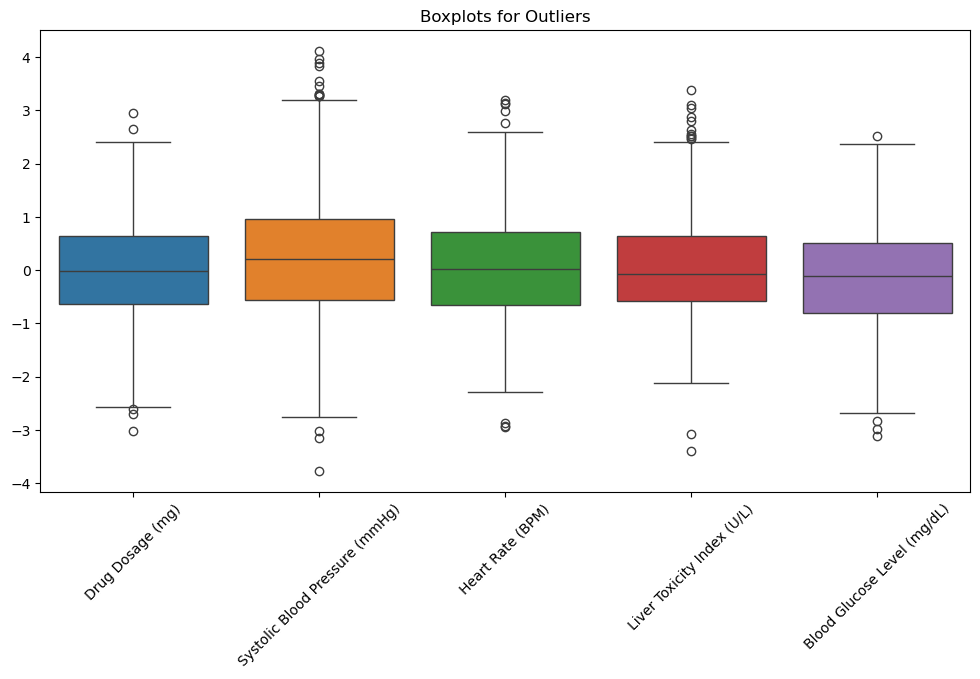

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop('Drug Response', axis=1))
plt.title('Boxplots for Outliers')
plt.xticks(rotation=45)
plt.show()

* <b>Correlations</b>

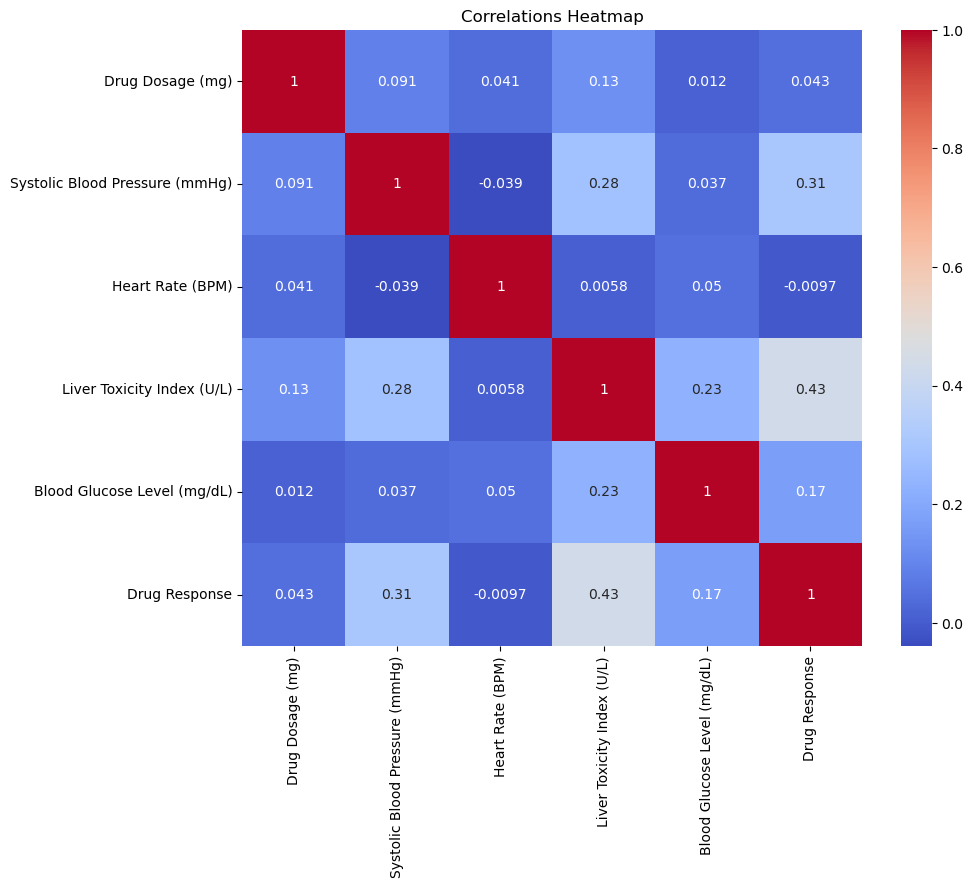

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlations Heatmap')
plt.show()

# Task 02: Preprocessing

In [19]:
X = data.drop('Drug Response', axis=1)
y = data['Drug Response']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Task 03: Data Visualization

* <b> Pairplot </b>

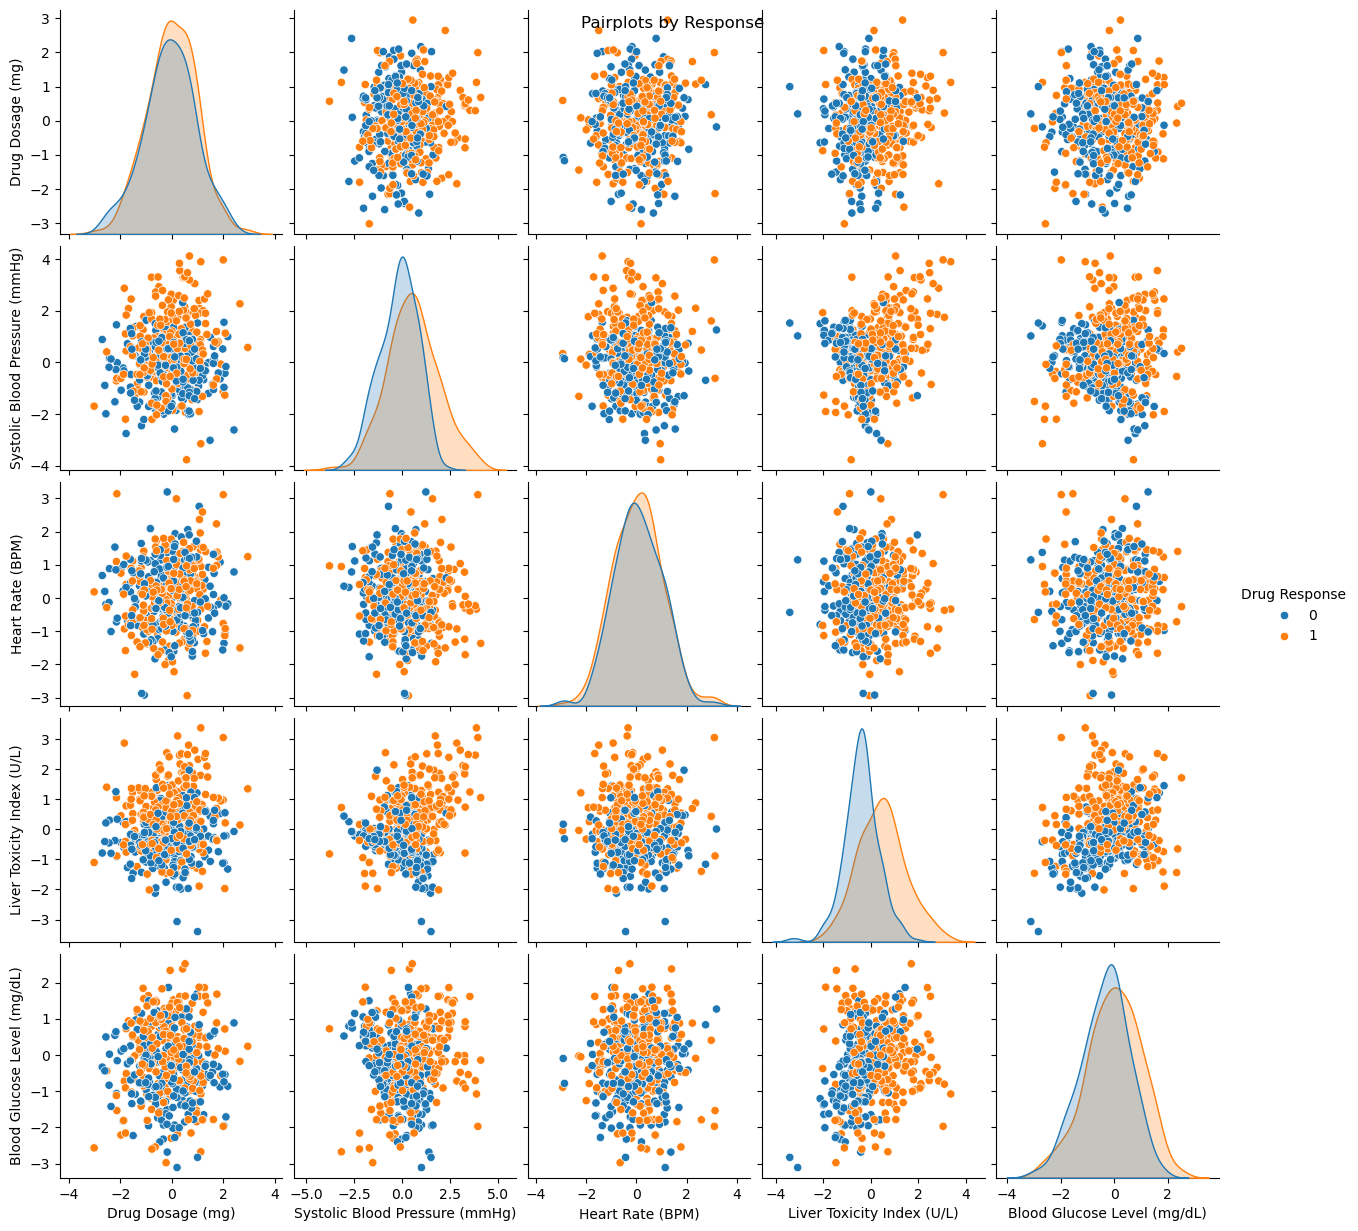

In [22]:
sns.pairplot(data, hue='Drug Response', diag_kind='kde')
plt.suptitle('Pairplots by Response')
plt.show()

# Task 04: SVM Implementation

In [23]:
svm_basic = SVC(kernel='linear', random_state=42)
svm_basic.fit(X_train, y_train)
y_pred = svm_basic.predict(X_test)

In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100

Confusion Matrix:
 [[36  8]
 [14 42]]
Accuracy: 0.7800, Precision: 0.8400, Recall: 0.7500, F1: 0.7925


# Task 05: Visualize SVM Results

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

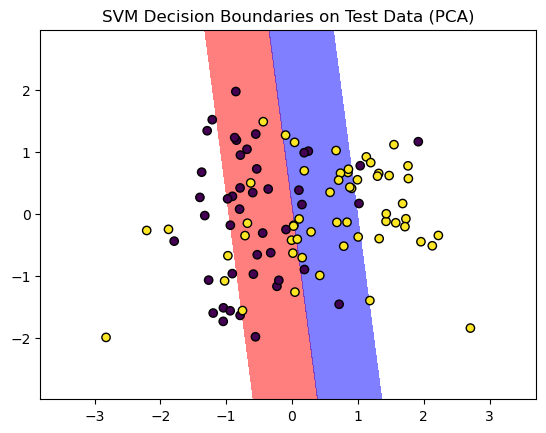

In [29]:
xx, yy = np.meshgrid(np.linspace(X_test_pca[:,0].min()-1, X_test_pca[:,0].max()+1, 100),
                     np.linspace(X_test_pca[:,1].min()-1, X_test_pca[:,1].max()+1, 100))
Z = svm_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors=['red', 'blue'])
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolors='k')
plt.title('SVM Decision Boundaries on Test Data (PCA)')
plt.show()

# Task 06: Parameter Tuning

In [30]:
param_grid = {'kernel':['linear','poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale','auto'] if 'rbf' or 'poly' else None}
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print('Best Params:', grid.best_params_)
y_pred_opt = grid.predict(X_test)
print('Optimized Report:', classification_report(y_test, y_pred_opt))

Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Optimized Report:               precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.87      0.84      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



# Task 07: Comparison

In [32]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    svm_k = SVC(kernel=k, random_state=42)
    svm_k.fit(X_train, y_train)
    y_pred_k = svm_k.predict(X_test)
    print(f"Kernel {k}: Accuracy {accuracy_score(y_test, y_pred_k):.4f}, F1 {f1_score(y_test, y_pred_k):.4f}")

Kernel linear: Accuracy 0.7800, F1 0.7925
Kernel poly: Accuracy 0.7000, F1 0.6739
Kernel rbf: Accuracy 0.8400, F1 0.8545


* Analysis: Linear Kernel fast/simplebut assumes linearity.
* RBF handles non-linear best but slower.
* SVM strong for small data dims, weak for large/noisy.
* Implications: Predict drug response early, reduce trial costs.
